# Chapter6. 학습 관련 기술들

## 6.1 매개변수 갱신

* 신경망 학습의 목적 : 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것
* 최적화 : 최적 매개변수를 찾는 문제
* 확률적 경사 하강법(SGD) 외에 다른 기법들도 존재

### 6.1.1 모험가 이야기

* 지도를 보지 않고 눈 가리개를 쓴 모험가가 가장 깊고 낮은 골짜기를 찾는 문제와 유사

### 6.1.2 확률적 경사 하강법(SGD)

<img src="./images/6.1.png" width="150" height="150"/>
(6.1)

In [1]:
# SGD 구현

In [2]:
class SGD:
    def __init__(self, lr =0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [3]:
# 의사코드

In [ ]:
network = TwoLayerNet(...)
optimizer = SGD()

In [ ]:
for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...)
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...
    

### 6.1.3 SGD의 단점

#### (예시) 함수의 최솟값 구하기 문제

<img src="./images/6.2.png" width="150" height="150"/>
(6.2)

<img src="./images/6-1.png" width="400" height="400"/>
[6-1]

<img src="./images/6-2.png" width="300" height="300"/>
[6-2]

#### (x, y) = (-7.0, 2.0)에서 시작한다고 가정

<img src="./images/6-3.png" width="300" height="300"/>
[6-3]

* SGD의 움직임이 비효율적이다
* SGD의 단점으로 비등방성(anisotropy) 함수에서 탐색 경로가 비효율적

### 6.1.4 모멘텀

#### (수식)

<img src="./images/6.3.png" width="150" height="150"/>
(6.3)

<img src="./images/6.4.png" width="100" height="100"/>
(6.4)

* $W$ : 갱신할 가중치 매개변수
* $\frac {\partial L}{\partial W}$ : W에 대한 손실 함수의 기울기
* $\eta$ : 학습률
* $v$ : 속도
* $\alpha v$ : 마찰(저항)의 역할

In [3]:
# 구현

In [4]:
import numpy as np

In [5]:
class Momentum :
    def __init__(self, lr = 0.01, momentum = 0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

#### (모멘텀의 경로)

<img src="./images/6-5.png" width="350" height="350"/>
[6-5]

### 6.1.5 AdaGrad

* 학습률 감소(learning rate decay) : 학습을 진행하면서 학습률을 점차 줄여가는 방법

#### (AdaGrad의 수식)

<img src="./images/6.5.png" width="150" height="150"/>
(6.5)

<img src="./images/6.6.png" width="150" height="150"/>
(6.6)

* 기울기가 크면 h값이 커짐
* 해당 값의 학습률을 낮춰짐

In [6]:
# 구현

In [7]:
class AdaGrad:
    def __init__(self, lr = 0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
    
            for key.val in params.items():
                self.h[key] = np.zeros(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) +1e-7) # 1e-7은 h가 0인 경우 나누기 문제를 막아줌

<img src="./images/6-6.png" width="350" height="350"/>
[6-6]

### 6.1.6 Adam

* 모멘텀 : 공이 그릇을 구르는 듯한 물리 법칙에 따르는 움직임
* AdaGrad : 매개변수 원소마다 적응적으로 갱신 정도 조종

> Adam : 두 기법 융합

<img src="./images/6-7.png" width="350" height="350"/>
[6-7]

* Adam의 하이퍼 파라미터
    * 학습률 ($\alpha$)
    * 일차 모멘텀용 계수 ($\beta_1$) (기본값 0.9)
    * 이차 모멘텀용 계수 ($\beta_2$) (기본값 0.999)

### 6.1.7 어느 갱신 방법을 이용할 것인가?

<img src="./images/6-8.png" width="550" height="550"/>
[6-8]

* 슬프게도 모든 문제에서 항상 뛰어난 기법은 (아직까지) 없다

### 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교

<img src="./images/6-9.png" width="450" height="450"/>
[6-9] 흑백이라 뭐가 뭔지 모를거같다 ㅋㅋㅋㅋ
맨 위에 그래프부터 SGD, 모멘텀, Adam, AdaGrad이다

## 6.2 가중치의 초깃값

* 이제 드디어 4.5.1에서 의문으로 두었던 가중치의 초깃값에 대해 다룬다
* 당시에는 정규분포를 따르는 난수로, 편향은 0을로 초기화했다.

### 6.2.1 초깃값을 0으로 하면?

* 가중치 감소 : 가중치 매개변수의 값이 작아지도록 학습하는 방법. 
    * 가중치 값을 작게 하여 오버피팅이 일어나지 않게 함

#### (가중치의 초깃값을 0으로(혹은 균일한 값) 한다면?)

* 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문에 사용하면 안 된다.
* 가중치가 고르게 되는 상황을 막으려면(가중치의 대칭적인 구조를 무너뜨리려면) 초깃값을 무작위로 설정해야 한다

### 6.2.2 은닉층의 활성화값 분포

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

In [10]:
x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 # 각 은닉층 노드 수
hidden_layer_size = 5 # 5층의 은닉층
activations = {} # 활성화 결과값 저장

In [11]:
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

In [12]:
#히스토그램 그리기

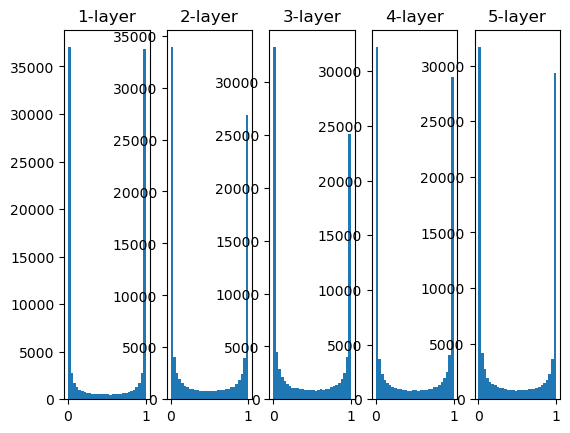

In [13]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 기울기소실 : 시그모이드 함수는 출력이 0(또는1)에 가까워지면 미분이 0으로 다가가기 때문에 역전파의 기울기 값이 점점 작아지다가 사라진다

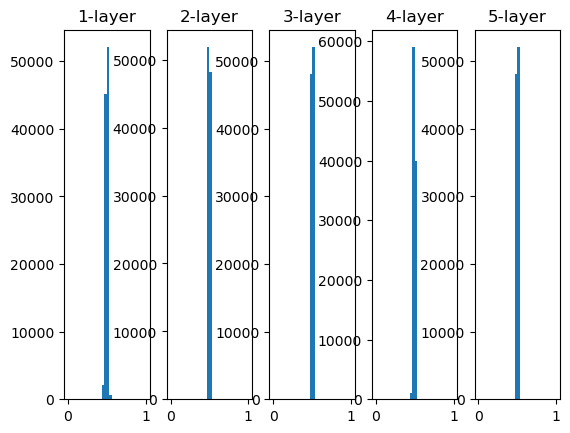

In [14]:
# 가중치 초기값 설정 수정

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 위 방법은 기울기 소실 문제는 해결하지만 활성화값들이 치우쳐있다는 문제가 존재
* 각 층의 활성화 값은 적당히 고루 분포되어야 하는데 그래야만 신경망 학습이 효율적으로 이뤄질 수 있다(왜?)

#### (사비에르 글로로트, 요수아 벤지오 논문 권장 가중치) Xavier 초깃값

* 일반적인 딥러닝 프레임워크들에서 표준적으로 이용 중
* 각 층의 활성화값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포로 앞 계층의 노드가 $n$개라면 표준편차가 $\frac{1}{\sqrt n}$인 분포를 사용하면 된다는 결론을 내림

<img src="./images/6-12.png" width="400" height="400"/>
[6-12]

In [15]:
node_num = 100

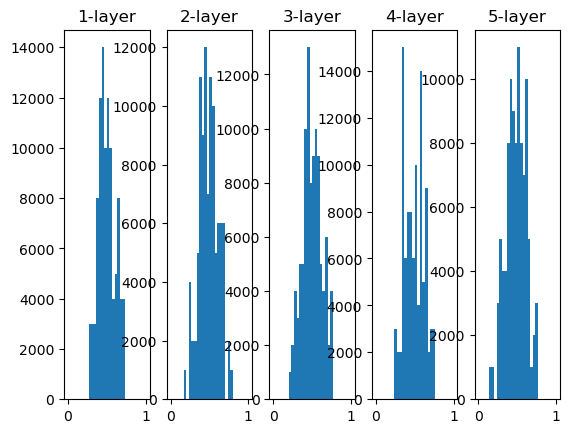

In [16]:
# 가중치 초기값 설정 수정

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    
    w = np.random.randn(node_num, node_num) /np.sqrt(node_num)
    a = np.dot(x,w)
    z = sigmoid(a)
    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

### 6.2.3 ReLU를 사용할 때의 가중치 초깃값

* Xavier 초깃값은 활성화 함수가 선형인 것이 전제
* sigmoid와 tanh 함수는 좌우 대칭이라 중앙 부근이 선형이 함수로 볼 수 있다<br>
(사실 교재 표현이 잘 이해 안 가는데 좌우 대칭이라는 건... 아마 의미는 정확히는 원점대칭이고(sinmoid는 (0,1/2)), 해당 점의 부근에선 접선을 선형함수로 본다는 의미인 것 같다...)
* 분명 활성화함수는 선형함수로 하면 안 되고 비선형함수로 써야한다고 3.2.6에서 언급했다

#### (참고) 선형함수란?

$x, x_1, x_2 \in X, a \in \mathbb{R} $에 대해서, 함수 $f : X \to Y $가 다음의 두 조건을 만족하면 선형이라고 한다

$$f(ax) = af(x)$$
$$f(x_1+x+2) = f(x_1)+f(x_2)$$

#### (ReLU에 특화된 초깃값)
* He 초깃값 (카이밍 히의 이름에서 가져옴)
* 앞 계층의 노드가 $n$개일 때, 표준편차가 $\sqrt \frac{2}{n}$인 정규분포를 사용
* ReLU는 음의 영역이 0이라서 더 넓게 분포시키기 위해 2배를 곱한 계수를 사용

##### 활성화 함수로 ReLU를 사용한 경우 가중치 초깃값에 따른 활성화값 분포 변화

<img src="./images/6-14.png" width="450" height="450"/>
[6-14]

* 첫번째의 경우 대부분 0에 근사하는 작은 값으로 역전파 때 가중치의 기울기가 작아진다는 뜻이며, 실제 학습이 거의 이뤄지지 않음
* 두번째의 경우 층이 깊어지면서 치우침이 커짐. 때문에 기울기 소실 문제를 일으킴
* 모든 층에서 균일하게 분포하고 있기 때문에 역전파 때에도 적절한 값 나올 것으로 기대

### 6.2.4 MNIST 데이터셋으로 본 가중치 초깃값 비교

<img src="./images/6-15.png" width="400" height="400"/>
[6-15]

* std=0.01일 때는 학습이 이뤄지지 않음. 순전파 때 너무 작은 값(0근접)이 흐르기 때문
* Xavier와 He는 학습이 이뤄지고 있음


## 6.3 배치 정규화

#### (아이디어)
* 초깃값을 적절히 설정하여 각 층의 활성화값 분포가 적당히 퍼질 때 학습이 잘 진행된 것처럼, 각 층의 활성화를 적당피 퍼뜨리도록 강제하는 것

### 6.3.1 배치 정규화 알고리즘

#### (배치 정규화가 주목 받는 이유)

* 학습 속도 개선
* 초깃값에 크게 의존하지 않음
* 오버피팅 억제(드롭아웃 등의 필요성 감소)

<img src="./images/6-16.png" width="450" height="450"/>
[6-16]

* 배치 정규화 계층을 신경망에 삽입
* 미니배치를 단위로 정규화

* 미니배치 $B = {x_1, x_2, ...,x_m}$이라는 $m$개의 입력 데이터에 대해 평균 $\mu_B$와 $\sigma^2_B$는, $\hat{\chi _i}$  다음과 같다

<img src="./images/6.7.png" width="150" height="150"/>
[6.7]

<img src="./images/6.8.png" width="100" height="100"/>
[6.8]

* 각 배치 정규화 계층마다 고유한 확대와 이동변환 수행
* $\gamma (=1 시작)$ : 확대 $\beta(=0시작)$ : 이동

<img src="./images/6-17.png" width="500" height="500"/>
[6-17]

[프레드릭 크레저트의 블로그](https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html) 에서 배치 정규화의 역전파 유도 구체적인 설명 확인가능

### 6.3.2 배치 정규화의 효과

#### 학습 속도를 높인다

<img src="./images/6-18.png" width="400" height="400"/>
[6-18]

#### (가중치 초깃값의 표준편차를 다양하게 바꿔서 학습한 경우, 실선:배치정규화 점선:배치정규화 X)

<img src="./images/6-19.png" width="400" height="400"/>
[6-19]

* 가중치 초깃값에 크게 의존하지도 않음

## 6.4 바른 학습을 위해

* 오버피팅 : 신경망이 훈련 데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태

### 6.4.1 오버피팅

#### (오버피팅이 일어나는 주된 이유)

* 매개변수가 많고 표현력이 높은 모델
* 훈련 데이터가 적은 경우

In [17]:
from dataset.mnist import load_mnist

In [18]:
from common.multi_layer_net import MultiLayerNet

In [19]:
from common.optimizer import SGD

In [20]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [21]:
#오버피팅 재현하기 위한 학습 데이터 수 줄임

In [22]:
x_train = x_train[:300]
t_train = t_train[:300]

In [23]:
network = MultiLayerNet(input_size=784, hidden_size_list= [100, 100, 100, 100, 100, 100], output_size=10)

In [24]:
optimizer = SGD(lr = 0.01)

In [25]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

In [26]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

In [27]:
iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [28]:
for i in range(10000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

<img src="./images/6-20.png" width="400" height="400"/>
[6-20]

### 6.4.2 가중치 감소

* 가중치 감소 : 학습 과정에서 큰 가중치에 대해 상응하는 큰 페널티를 부과하여 오버피팅을 억제하는 방법

#### (NORM 이란?)
* 벡터에서의 길이 혹은 크기를 측정하는 방법

$$L_p = ( \sum_{i}^{n}\left| x_i \right|^p)^\frac{1}{p}$$
* $p$ : 차수, $n$ : 벡터의 요소 개수

#### (신경망 학습 복습)

* 신경망 학습 목적 : 손실 함수의 값 줄이기
* 이 때 L2 법칙을 손실 함수에 더해본다.
* 손실함수가 $L$이고 가중치가 $W$일 때 손실 함수에 L2 법칙을 적용한 식을 $Cost$이라고 하면<br> 
$Cost = L + \lambda \sum_{i=1}^{n} w_i^2 $ 이라고 할 수 있다(L2를 적용한 것을 릿지(Ridge)라고 한다; L1은 랏소(Lasso))

미분할 때 깔끔하게 하기 위해
$Cost = L + \frac{1}{2}\lambda \sum_{i=1}^{n} w_i^2 $ 로 정리한다

* 식을 해석하자면 $\lambda$ 가 클수록 큰 가중치에 대한 페널티가 커진다

#### (가중치 감소를 이용한 훈련데이터와 시험데이터에 대한 정확도 추이: 6-20과 비교)

<img src="./images/6-21.png" width="400" height="400"/>
[6-21]

### 6.4.3 드롭아웃

* 신경망 모델이 복잡해질수록 가중치 감소만으로는 오버피팅을 억제하기 어렵다

* 드롭아웃 : 뉴런을 임의로 삭제하면서 학습하는 방법
    * 뉴런을 무직위로 골라 삭제

<img src="./images/6-22.png" width="400" height="400"/>
[6-18]

In [29]:
# 드롭아웃 구현

In [30]:
class Dropout :
    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None 
        
    def forward(self, x, train_flg = True):
        if train_flg:
            self.mask = np.random(*x.shape) > self.dropout_ratio
            return x * self.mask
        
        else :
            return x* (1.0 - self.dropout_ratio)
    
    def backward(self, dout):
        return dout * self.mask

#### (왼쪽 : Dropout 없이 오른쪽 : Dropout 적용 :0.15)

<img src="./images/6-23.png" width="500" height="500"/>
[6-23]

* 앙상블 학습 : 개별적으로 학습시킨 여러 모델의 출력을 평균내어 추론하는 방식
* 신경망의 경우 같은(비슷한) 구조의 네트워크를 5개 준비해서 따로 학습시키고 5개의 평균을 내어 출력
* 드롭아웃은 학습 할 때 뉴런을 무작위로 삭제하는 행위가 매번 다른 모델을 학습시칸다고 생각할 수 있기 때문에 앙상블 학습과 비슷한 효과를 낼 수 있다

## 6.5 적절한 하이퍼파라미터 값 찾기

### 6.5.1 검증 데이터

* 하이퍼 파라미터의 성능을 평가할 때는 시험 데이터를 사용해서는 안 된다!!
    * 시험 데이터를 사용하여 하이퍼파라미터를 조정하면 하이퍼파라미터 값이 시험 데이터에 오버피팅되기 때문
    * 검증 데이터 : 하이퍼 파라미터 조정용 데이터    

>    
    훈련 데이터 : 매개변수 학습
    검증 데이터 : 하이퍼파라미터 성능 평가
    시험 데이터 : 신경망의 범용 성능 평가

In [31]:
# MNIST 검증 데이터 분리

In [32]:
from common.util import shuffle_dataset

In [33]:
(x_train, t_train), (x_test, t_test) = load_mnist()

In [34]:
# 훈련 데이터 셔플
x_train, t_train = shuffle_dataset(x_train,t_train)

In [35]:
# 20% 검증 데이터 분할

In [36]:
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

In [37]:
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

### 6.5.2 하이퍼파라미터 최적화

* 하이퍼파라미터 최적화는 그리드 서치같은 규칙적인 탐색보다는 무작위로 샘플링하여 탐색하는 것이 좋은 결과를 낸다고 한다
* 10의 계승 단위로(로그 스케일)이 일반적
* 최적화할 때는 딥러닝 학습에 오랜 시간 소요되기 때문에 에폭을 작게 하여 1회 평가 시간을 단축하는 것이 효과적

* 단계
    * 0단계 : 하이퍼파라미터 값 범위 설정
    * 1단계 : 설정된 범위에서 무작위 추출
    * 2단계 : 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고 검증 데이터로 평가(에폭은 작게 설정)
    * 3단계 : 1단계와 2단계를 특정 횟수(100회 등) 반복하여 정확도의 결과를 보고 하이퍼파라미터의 범위 좁히기

### 6.5.3 하이퍼파라미터 최적화 구현하기

In [38]:
weight_decay = 10 ** np.random.uniform(-8, -4)

In [39]:
weight_decay

1.0216770445412273e-08

In [40]:
lr = 10 ** np.random.uniform(-6,-2)

In [41]:
lr

3.352015375391174e-06

<img src="./images/6-24.png" width="400" height="400"/>
[6-24]